# Unit 5 - Financial Planning

In [10]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from dotenv import dotenv_values
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
os.environ
%matplotlib inline

In [11]:
# Load .env enviroment variables
load_dotenv("apca.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [39]:
# Set current amount of crypto assets
btc_stack = 1.1
eth_stack = 32

In [40]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [41]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
response_content_btc = response_data_btc.content
data_btc = response_data_btc.json()
print(json.dumps(data_btc, indent=4))

# Fetch current ETH price
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
print(json.dumps(data_eth, indent=4))

# both BTC and ETH price list will be seen below

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19350275,
            "total_supply": 19350275,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 30320.0,
                    "volume_24h": 17947180994,
                    "market_cap": 586586499331,
                    "percentage_change_1h": 0.0291356827296066,
                    "percentage_change_24h": 3.27551775445897,
                    "percentage_change_7d": 0.193918331049714,
                    "percent_change_1h": 0.0291356827296066,
                    "percent_change_24h": 3.27551775445897,
                    "percent_change_7d": 0.193918331049714
                }
            },
            "last_updated": 1681868097
        }
    },
    "metadata": {
        "timestamp": 1681868097,
        "num_cry

In [42]:
# Compute current value of my crypto
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_portfolio = btc_stack * btc_value 
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_portfolio = eth_stack * eth_value
my_total_portfolio = my_btc_portfolio + my_eth_portfolio

# Print current crypto wallet balance
print(f"The current value of your {btc_stack} BTC is ${my_btc_portfolio:0.2f}")
print(f"The current value of your {eth_stack} ETH is ${my_eth_portfolio:0.2f}")
print(f"The current value of your total portfolio is ${my_total_portfolio:0.2f}")

The current value of your 1.1 BTC is $33352.00
The current value of your 32 ETH is $67176.96
The current value of your total portfolio is $100528.96


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [24]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
os.environ
APCA_API_KEY_ID = os.getenv("APCA_API_KEY_ID")
APCA_API_SECRET_KEY = os.getenv("APCA_API_SECRET_KEY")

# Create the Alpaca API object
apca = tradeapi.REST(APCA_API_KEY_ID, APCA_API_SECRET_KEY, api_version = "v2")


In [18]:
# Format current date as ISO format
today = pd.Timestamp("2023-04-10", tz="America/Los_Angeles").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
daily_closing_prices_df = apca.get_bars(
    tickers,
    timeframe,
    start = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = daily_closing_prices_df[daily_closing_prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = daily_closing_prices_df[daily_closing_prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
daily_closing_prices_df = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
daily_closing_prices_df.head()


AGG                                    \
                             open      high     low  close   volume   
timestamp                                                             
2023-04-11 04:00:00+00:00   99.81   99.8800  99.590  99.81  4543803   
2023-04-12 04:00:00+00:00  100.17  100.2000  99.610  99.93  7226122   
2023-04-13 04:00:00+00:00  100.16  100.2677  99.805  99.89  3964799   
2023-04-14 04:00:00+00:00   99.56   99.5900  99.320  99.40  4503010   
2023-04-17 04:00:00+00:00   99.13   99.1750  98.880  98.90  4417660   

                                                     SPY                    \
                          trade_count       vwap    open    high       low   
timestamp                                                                    
2023-04-11 04:00:00+00:00       19479  99.740336  410.26  411.18  408.9200   
2023-04-12 04:00:00+00:00       33545  99.885733  411.87  412.17  407.4400   
2023-04-13 04:00:00+00:00       18405  99.967812  409.18  413.84  407.9922   
2023-04-14 04:00:00+00:00       19909  99.405533  412.81  415.09  410.0600   
2023-04-17 04:00:00+00:00       18342  98.943593  412.37  413.96  411.0850   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2023-04-11 04:00:00+00:00  409.72  59316777      403316  410.018650  
2023-04-12 04:00:00+00:00  408.05  86440377      639926  409.706051  
2023-04-13 04:00:00+00:00  413.47  85814754      566796  411.717306  
2023-04-14 04:00:00+00:00  412.46  75973321      573427  412.263399  
2023-04-17 04:00:00+00:00  413.94  64863629      465564  412.594340

In [21]:
# Pick AGG and SPY close prices
agg_closing_price = float(daily_closing_prices_df['AGG']['close'][0])
spy_closing_price = float(daily_closing_prices_df['SPY']['close'][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_closing_price}")
print(f"Current SPY closing price: ${spy_closing_price}")

Current AGG closing price: $99.81
Current SPY closing price: $409.72


In [33]:
# Compute the current value of shares
agg_value = my_agg * agg_closing_price 
spy_value = my_spy * spy_closing_price 

# Print current value of shares
print(f"The current value of your {my_spy} SPY stock shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG stock shares is ${agg_value:0.2f}")

The current value of your 50 SPY stock shares is $20486.00
The current value of your 200 AGG stock shares is $19962.00


### Savings Health Analysis

In [45]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_portfolio + my_eth_portfolio
total_stock_shares_value = agg_value + spy_value
data = {'amount':[total_crypto, total_stock_shares_value]}

# Consolidate financial assets data
total_stocks = spy_value + agg_value
print(f"The current value of total stocks is {total_stocks:,.2f} USD")
print(f"The current value of the total crypto is {my_total_portfolio:,.2f} USD")

# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

The current value of total stocks is 40,448.00 USD
The current value of the total crypto is 100,528.96 USD


,amount
crypto,100528.96
shares,40448.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

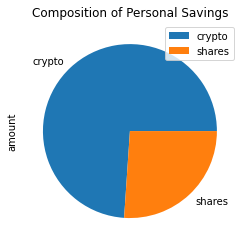

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")


In [64]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_stock_shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have got enough money in your emergency funds.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")
              

Congratuations! You have got enough money in your emergency funds.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [48]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/Los_Angeles').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/Los_Angeles').isoformat()

In [51]:
# Get 5 years' worth of historical data for SPY and AGG
stock_data_df = apca.get_bars(
    tickers, 
    timeframe, 
    start_date, 
    end_date).df
# Reorganize the DataFrame
# Separate ticker data
AGG = stock_data_df[stock_data_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = stock_data_df[stock_data_df['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
stock_data_df = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
stock_data_df.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [65]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = stock_data_df, 
    weights = [.50,.50], 
    num_simulation = 300, 
    num_trading_days = 252*30)

In [66]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()


AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [72]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()
pd.concat(axis=1)
newframe = frame.copy()
portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 110.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 120.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 130.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 140.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 150.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 160.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 170.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 180.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 190.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 200.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 210.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 220.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 230.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 240.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 250.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 260.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 270.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 280.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 290.


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame

TypeError: concat() missing 1 required positional argument: 'objs'

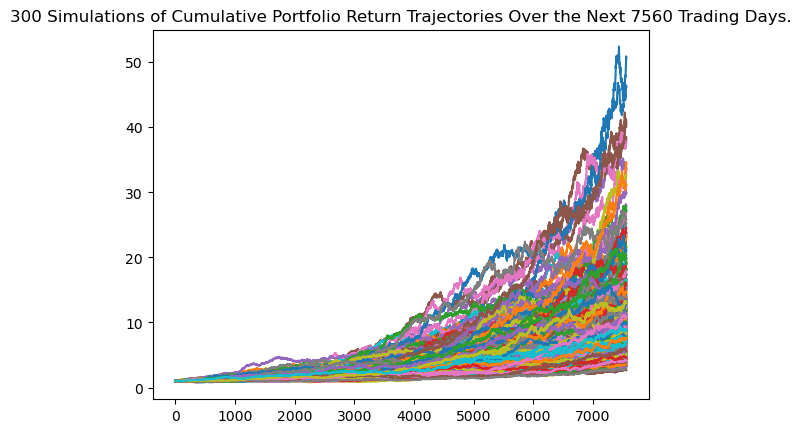

In [73]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

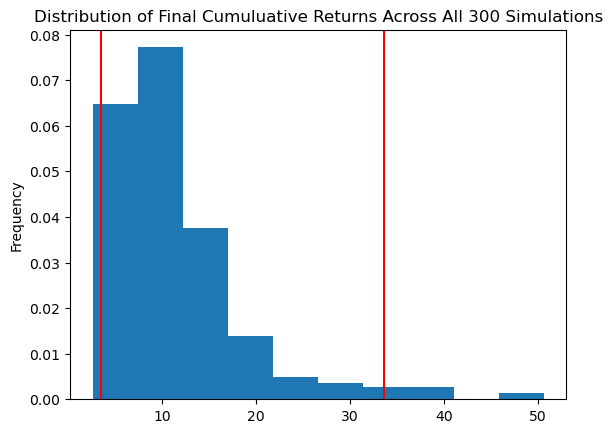

In [75]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [76]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)


count           300.000000
mean             11.425681
std               7.354191
min               2.663122
25%               6.655782
50%               9.711063
75%              13.481508
max              50.586653
95% CI Lower      3.571590
95% CI Upper     33.653873
Name: 7560, dtype: float64


/Users/d/Fintech/Fintech/Assignment_5/Financial_Planner/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95594.94 and $1281072.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143392.41 and $1921608.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


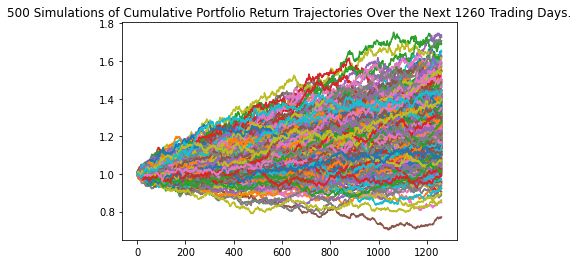

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

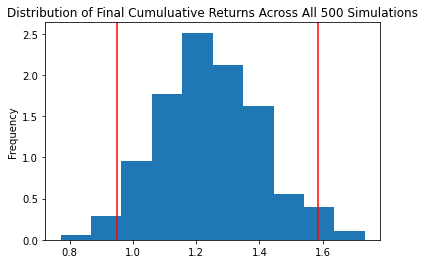

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


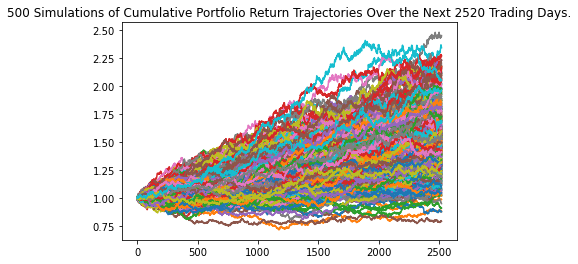

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

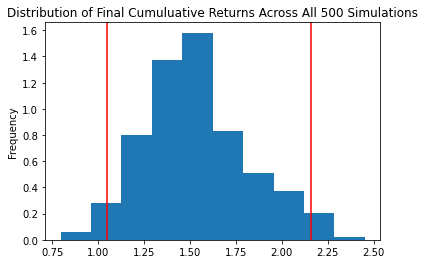

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
